In [2]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for numerical inegration
import scipy.integrate

# for pretty plots
import seaborn as sns
sns.set(font_scale = 1, rc={"lines.linewidth":3})

Throughout this midterm, we will be considering multiple aspects of the following differential equation:

$$\dot N = N (r-a(N-b)^2)$$

This model demonstrates something known as the Allee effect, where the *relative* growth rate $\dot N /N$ is highest at an intermediate value of $N$. For example, imagine that it is too hard to find mates when $N$ is very small, and there is too much competition for food and other resources when $N$ is too large. For this model to be biologically relevant, $a$, $b$, and $r$ must all be positive.

Note that each part can be done in isolation. So if you get stuck, I recommend you move to a new part.

## Part 1 (3 pts):

**What are the fixed points of this system? You can do your math on pen and paper if you choose, but please report your results here.**

The fixed points are $N=0$, $N=b+\sqrt{r/a}$, and  $N=b-\sqrt{r/a}$

We arrive at the latter two by setting $r - a(N-b)^2$ equal to zero:

\begin{align}
r - a(N-b)^2 &= 0 \\[1em]
a(N-b)^2 &= r \\[1em]
(N-b)^2 &= r/a \\[1em]
N-b &= \pm \sqrt{r/a} \\[1em]
N &= b \pm \sqrt{r/a}
\end{align}

## Part 2 (6 pts):

**(a) Plot $\dot N$ vs. $N$. Use the following parameter values: $a=1$, $b=3$, $r=4$. Make sure to plot over a relevant range of values so that you can clearly see the fixed points you found in Part 1.**

$$\dot N = N (r-a(N-b)^2)$$

Text(0, 0.5, '$\\dot N$')

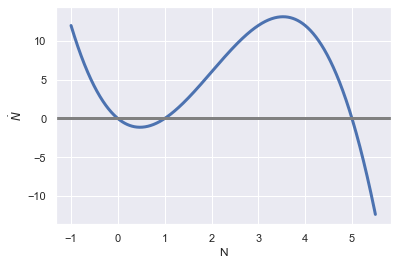

In [3]:
a=1
b=3
r=4

N = np.linspace(-1,5.5,1000)
N_dot = N*(r-a*(N-b)**2)

plt.plot(N, N_dot)
plt.axhline(y=0, color="gray")
plt.xlabel("N")
plt.ylabel("$\dot N$")

**(b) From your plot above, state the stability of each of the fixed points.**

- $N = 0$ is stable (slope through the fixed point is negative)

- $N = 1$ is unstable (slope through the fixed point is positive)

- $N = 5$ is stable (slope through the fixed point is negative)

**(c) Name one key way in which this model of growth differs from logistic growth.**

Possible answers:
- This model of growth has three fixed points, while logistic growth had only two.
- In this model the fixed point at $N=0$ is stable, while in logistic growth the fixed point at $N=0$ is unstable.
- Putting these facts together, the Allee model results in there being a minimum population required for the population to grow. If the population starts below this threshold, the population will die out. By contrast, the logistic model means the population will *always* grow as long as is starts above $N=0$.

## Part 3 (7 pts):

**(a) Numerically integrate the differential equation for the Allee model using the second-order "improved" Euler method. Run your approximation for a total time of $1$, and with a $\Delta t$ of $0.01$. Initiate the population with three different values in turn: `[0.9, 1.0, 1.1]`, and plot the resulting trajectories on the same plot. If you get stuck on this part, you are welcome to try a different numerical integration approach for partial credit.**

$$\dot N = N (r-a(N-b)^2)$$

In [4]:
def f(N):
    """ The differential equation for Allee model """
    N_dot = N*(r-a*(N-b)**2)
    return N_dot

Text(0, 0.5, 'N')

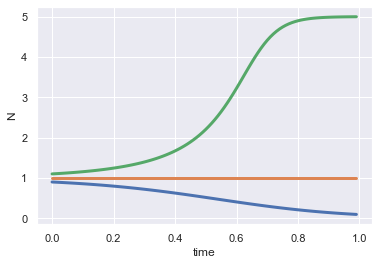

In [5]:
total_time = 1
dt = 0.01
numsteps = int(total_time/dt)

N = np.zeros(numsteps)
N[0] = 0.9

times = np.arange(numsteps)*dt

for t in range(numsteps-1):
    dN = N[t]*(r-a*(N[t]-b)**2)*dt
    N_tilde = N[t] + dN
    dN_tilde = N_tilde*(r-a*(N_tilde-b)**2)*dt
    N[t+1] = N[t] + 0.5*(dN + dN_tilde)
    
plt.plot(times, N)

N[0] = 1.0

for t in range(numsteps-1):
    dN = N[t]*(r-a*(N[t]-b)**2)*dt
    N_tilde = N[t] + dN
    dN_tilde = N_tilde*(r-a*(N_tilde-b)**2)*dt
    N[t+1] = N[t] + 0.5*(dN + dN_tilde)
    
plt.plot(times, N)

N[0] = 1.1

for t in range(numsteps-1):
    dN = N[t]*(r-a*(N[t]-b)**2)*dt
    N_tilde = N[t] + dN
    dN_tilde = N_tilde*(r-a*(N_tilde-b)**2)*dt
    N[t+1] = N[t] + 0.5*(dN + dN_tilde)
    
plt.plot(times, N)
plt.xlabel("time")
plt.ylabel("N")

**(b) From what you see in your plot, how does this match the stability of the fixed points that you determined in Part 2? Alternatively, if you didn't complete Part 2, what seem to be the fixed points and their stabilities?**

From this plot, we see that $N=0$ and $N=5$ again appear to be stable fixed points, as the value of $N$ tends towards these values over time.

Conversely, $N=1$ appears to be an unstable fixed point, since starting just above or below this value causes the population to deviate away from this value over time. 

**(c) If you were to instead numerically integrate with the regular Euler method, how would the quality of the approximation be impacted?** 

The quality of the approximation would be *worse* if we used the first-order Euler method instead. 

As an extension: whether it over- or under-estimates the second-order approximation will change depending where we are in the integration. As an example with the green curve, Euler would initially underestimate, as the slope keeps increasing with time. But later on, Euler would overestimate as the slope begins to decrease with time. 

## Part 4 (6 pts.):

**It turns out that the Allee effect model we have been considering applies well to pigeons. However, what we have looked at so far disregards the potential impact of other organisms. **

**(a) Below, specify what a potential model of "pigeons ($x$) vs. squirrels ($y$)" might look like. We assume that in the absence of squirrels, the pigeon population will grow according to this *Allee model*. Conversely, we assume that in the absence of pigeons, the squirrel population will grow according to *logistic growth*. Make sure your model includes these two methods of growth, as well as an potential interaction between the pigeon and squirrel populations.**

$$ \dot x = \, x (r-a(x-b)^2) - cxy $$

$$ \dot y = \, ky(1-y/K) - cxy $$

**(b) Explain the meaning of any new parameters you may have introduced here. Explain the biological meaning of each mathematical term and potentially how it relates to the interaction between pigeons and squirrels.**

The new parameters are:

- $k$, the growth rate of the squirrels.
- $K$, the carrying capacity of the squirrel population.
- $c$, the impact that the two populations have on each other. Since pigeons and squirrels are about the same size, I'm assuming they have the same impact on each other. If I wanted to model them having different levels on impact on each other, I could instead use two separate parameters. 

The terms have the following interpretations:

- $x (r-a(x-b)^2)$ is the way in which the pigeon population grows, according to the Allee model
- $ky(1-y/K)$ is the way in which the squirrel population grows, according to the logistic growth model
- $-cxy$ is the rate at which both population die as a result of inter-species competition

## Submission

Please save and export your file as HTML, and upload it to Canvas.

If you would like me to consider any scratch work for partial credit, please turn in your paper to me.

**If you run into any submission issues, please email me your .ipynb file instead.**